In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
ds = pd.read_csv("titanic.csv")
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12120\2429827587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Fare'])


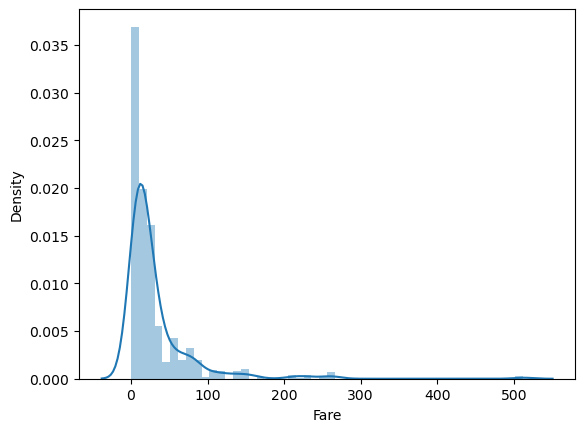

In [6]:
sns.distplot(ds['Fare'])
plt.show()

In [29]:
q1 = ds['Fare'].quantile(0.25)
q3 = ds['Fare'].quantile(0.75)
iqr = q3-q1

In [30]:
min_r = q1 - 1.5*iqr
max_r = q3 + 1.5*iqr
min_r,max_r

(-19.260499999999997, 53.1563)

In [31]:
ds = ds[ds['Fare']<= max_r] 

C:\Users\USER\AppData\Local\Temp\ipykernel_12120\2429827587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Fare'])


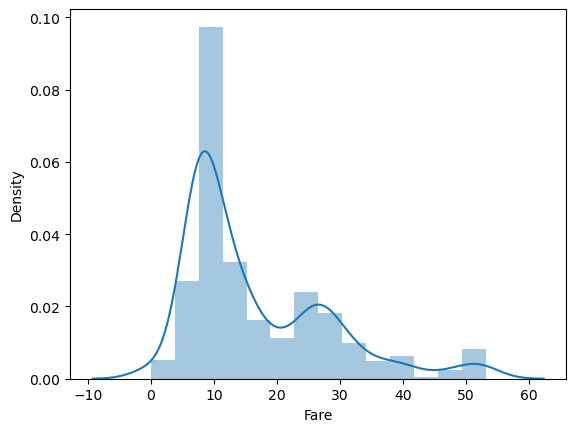

In [32]:
sns.distplot(ds['Fare'])
plt.show()

In [33]:
from sklearn.preprocessing import FunctionTransformer

In [40]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(ds[['Fare']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [41]:
ds['fare_tf'] = ft.transform(ds[['Fare']])

C:\Users\USER\AppData\Local\Temp\ipykernel_12120\1542338005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['fare_tf'] = ft.transform(ds[['Fare']])


In [35]:
ds['fare_tf'] = ft.transform(ds[['Fare']])

C:\Users\USER\AppData\Local\Temp\ipykernel_12120\1542338005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['fare_tf'] = ft.transform(ds[['Fare']])


In [36]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_tf
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,2.246893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


C:\Users\USER\AppData\Local\Temp\ipykernel_12120\1851038777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Fare'])
C:\Users\USER\AppData\Local\Temp\ipykernel_12120\1851038777.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['fare_tf'])


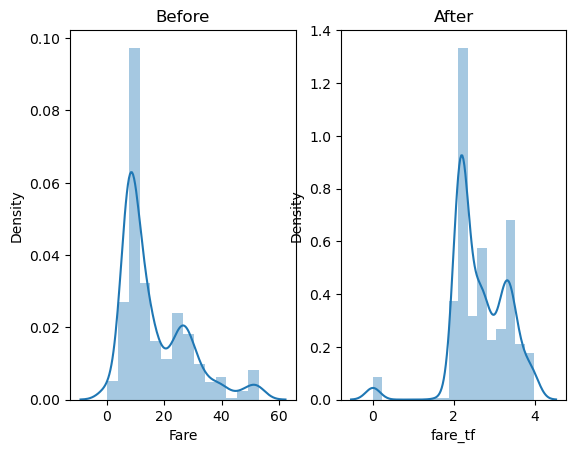

In [37]:
plt.subplot(1,2,1)
sns.distplot(ds['Fare'])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(ds['fare_tf'])
plt.title("After")
plt.show()

In [38]:
ft1 = FunctionTransformer(func= lambda x: x**2)
ft1.fit(ds[['Fare']])

FunctionTransformer(func=<function <lambda> at 0x00000189C8264220>)

In [42]:
ds['fare_tf1'] = ft.transform(ds[['Fare']])

C:\Users\USER\AppData\Local\Temp\ipykernel_12120\1466654035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['fare_tf1'] = ft.transform(ds[['Fare']])


C:\Users\USER\AppData\Local\Temp\ipykernel_12120\263731578.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Fare'])
C:\Users\USER\AppData\Local\Temp\ipykernel_12120\263731578.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['fare_tf1'])


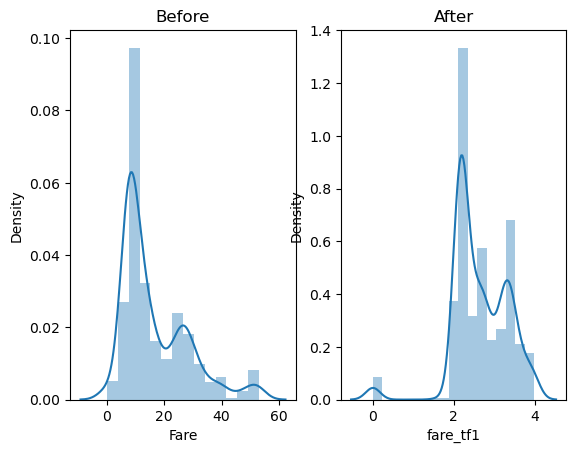

In [43]:
plt.subplot(1,2,1)
sns.distplot(ds['Fare'])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(ds['fare_tf1'])
plt.title("After")
plt.show()